<a href="https://colab.research.google.com/github/tuananhnguyen512/AI2023_class/blob/main/10dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import các thư viện
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#load file ảnh từ ggdrive đặt tên 
Pic ='/content/drive/MyDrive/Picture/dishes/'
photos,labels = list(),list()

In [3]:
#gán nhãn cho các món ăn
for file in listdir(Pic):
  output = 0.0
  if file.startswith('Banhmi'):
    output = 1.0
  if file.startswith('Banhxeo'):
    output = 2.0
  if file.startswith('Comtam'):
    output = 3.0
  if file.startswith('Bunbo'):
    output = 4.0 
  if file.startswith('Cakhoto'):
    output = 5.0
  if file.startswith('Xoi'):
    output = 6.0
  if file.startswith('Hutieu'):
    output = 7.0
  if file.startswith('Banhbeo'):
    output = 8.0
  if file.startswith('Banhtet'):
    output = 9.0
  if file.startswith('Goicuon'):
    output = 10.0
  photo = load_img(Pic+file, target_size = (100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [4]:
# Convert list photos, labels to Numpy
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)


(915, 100, 100, 3) (915,)


In [5]:
save('/content/drive/MyDrive/Pic_train/dishes_photos.npy',photos)
save('/content/drive/MyDrive/Pic_train/dishes_labels.npy',labels)

In [6]:
#lấy dữ liệu để sử dụng
photos = np.load('/content/drive/MyDrive/Pic_train/dishes_photos.npy')
labels = np.load('/content/drive/MyDrive/Pic_train/dishes_labels.npy')

In [7]:
# Chuẩn hóa dữ liệu
x_train = photos.astype('float32')/255
y_train = labels
y_train = to_categorical(y_train, num_classes=11)
print(x_train.shape, y_train.shape)

(915, 100, 100, 3) (915, 11)


In [9]:
# Import library training model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy

In [10]:
# Config model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100, 100, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(11, activation='softmax'))

In [11]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 60, epochs = 10, verbose = 1)

Epoch 1/10
16/16 [==============================] - 11s 39ms/step - loss: 2.6322 - accuracy: 0.2011
Epoch 2/10
16/16 [==============================] - 1s 31ms/step - loss: 2.0628 - accuracy: 0.2732
Epoch 3/10
16/16 [==============================] - 0s 29ms/step - loss: 1.8507 - accuracy: 0.3923
Epoch 4/10
16/16 [==============================] - 1s 34ms/step - loss: 1.6403 - accuracy: 0.4393
Epoch 5/10
16/16 [==============================] - 0s 27ms/step - loss: 1.4324 - accuracy: 0.5464
Epoch 6/10
16/16 [==============================] - 0s 31ms/step - loss: 1.1633 - accuracy: 0.6044
Epoch 7/10
16/16 [==============================] - 0s 30ms/step - loss: 0.8950 - accuracy: 0.7060
Epoch 8/10
16/16 [==============================] - 0s 25ms/step - loss: 0.7793 - accuracy: 0.7497
Epoch 9/10
16/16 [==============================] - 0s 24ms/step - loss: 0.4550 - accuracy: 0.8557
Epoch 10/10
16/16 [==============================] - 0s 24ms/step - loss: 0.3338 - accuracy: 0.8973


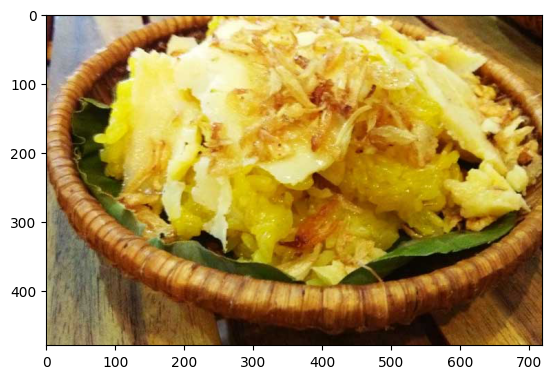

1/1 [==============================] - 0s 371ms/step
6
Món:  Xôi


In [15]:
# Mở ảnh
img = Image.open('/content/drive/MyDrive/Pic_test/dishes_test/2.jpg')

# Resize ảnh về kích thước mong muốn
IMG = img
img = img.resize((100, 100))

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32') / 255.0

plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết", "Bánh mì", "Bánh xèo", "Cơm tấm", "Bún bò", "Cá kho tộ", "Xôi", "Hủ tiếu", "Bánh bèo", "Bánh tét", "Gỏi cuốn"]
temp1 = matrix[0]
print(temp1)
print("Món: ", class_names[temp1])

In [20]:
model.save('/content/drive/MyDrive/Model_Trained/10dishes_train.h5')
